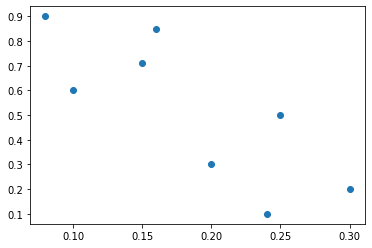

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style

X = np.array([[0.1,0.6],
              [0.15,0.71],
              [0.08,0.9],
              [0.16, 0.85],
              [0.2,0.3],
              [0.25,0.5],
              [0.24,0.1],
              [0.3,0.2]])

plt.scatter(X[:,0], X[:,1])
plt.show()

In [3]:
class K_Means:
    def __init__(self, k=2, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter

    def fit(self,data):

        self.centroids = {}

        for i in range(self.k):
            self.centroids[i] = data[i]

        for i in range(self.max_iter):
            self.classifications = {}

            for i in range(self.k):
                self.classifications[i] = []

            for featureset in data:
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)

            prev_centroids = dict(self.centroids)

            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)

            optimized = True

            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
                    print(np.sum((current_centroid-original_centroid)/original_centroid*100.0))
                    optimized = False

            if optimized:
                break

    def predict(self,data):
        for centroid in self.centroids:
          distances = np.linalg.norm(data - self.centroids[centroid])
        # distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification

74.66666666666669
2.1596244131455453


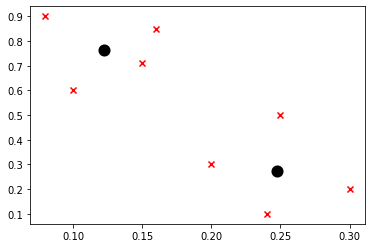

In [4]:
model = K_Means()
model.fit(X)

for centroid in model.centroids:
    plt.scatter(model.centroids[centroid][0], model.centroids[centroid][1],
                marker="o", color="k", s=50, linewidths=5)

for classification in model.classifications:
    # color = colors[classification]
    for featureset in model.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker="x", color='red', linewidths=5)
        
plt.show()

Assignment Questions and answers

Que 1: Which cluster does P6 belongs to?

Ans  : Point P6 belongs to the cluster 2

Que 2: What is the population of cluster around m2?

Ans  : 4 points are there in cluster 2 around m2.

Que 3: What is updated value of m1 and m2?

Ans  : m1 = (0.24,0.27)
       m2 = (0.12,0.76)